# Color detection of the shape

## Goal 
- find the contours
- find the color of the image
- find the shape of the image

## Steps
- find contours
- get the euclidean distance of each color
- work in LAB mode
- when distance is minimum - mark the color with label

## Theory
- Region of the image can be characterized by both the color histogram and by basic color channel statistics such as mean and standard deviation. 
- The label for the colors can be found out later
- LAB color space along with Euclidean Distance to tag label and determine the color

In [11]:
from shape_detector import ShapeDetector
from colorlabeler import ColorLabeler
import cv2
import imutils
import matplotlib.pyplot as plt

In [12]:
# function to display the image
def show(image,cmap=None):
    plt.imshow(image,cmap=cmap)
    plt.show()

In [13]:
# loading the image
image = cv2.imread('contour.jpg')
# resized = imutils.resize(image, width=300)
# image = resized.copy()
resized = image.copy()
ratio = image.shape[0] / float(resized.shape[0])

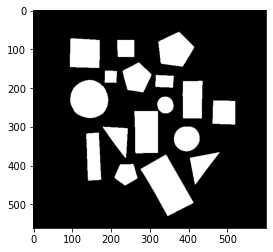

In [14]:
# Preprocessing the image
blur = cv2.GaussianBlur(resized, (5,5), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
lab = cv2.cvtColor(blur, cv2.COLOR_BGR2LAB)
T, thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)
show(thresh, cmap='gray')

In [15]:
# grab the contours
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [16]:
sd = ShapeDetector()
cl = ColorLabeler()

In [17]:
ratio

1.0

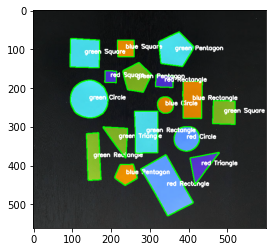

In [18]:
# processing the contours grabbed
# moments - contain the characteristics of the shape

green = (0,255,0)
white = (255,255,255)

for c in cnts:
    M = cv2.moments(c)
    try:
        cX = int((M['m10'] / M['m00'])*ratio)
        cY = int((M['m01'] / M['m00'])*ratio)
    except:
        # the first value is 0 - zero division error
        continue
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    
    shape = sd.detect(c)
    color = cl.label(lab, c)
    text = "{} {}".format(color, shape)
    
    cv2.drawContours(image, [c], -1, green, 2)
    cv2.putText(image, text, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, white, 2)
    # print(shape)    
show(image)


In [19]:
color

'green'